<h1><center>Laboratorio 5: El Pandas no Muerde (act IV) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla
- Auxiliar: Ignacio Meza D.
- Ayudante: Constanza Peña

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1:Santiago Valdivieso 
- Nombre de alumno 2:Catalina Contreras


### **Link de repositorio de GitHub:** `https://github.com/catafarro/MDS7202/blob/main/lab5/lab5.ipynb`

### Indice 

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

# Temas a tratar

- Programación orientada a objetos.
- Programación funcional.
- Librería Numpy para manejo de datos en arreglos/tensores.

## Reglas:

- Fecha de entrega: 22/10/2021
- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
!pip install --upgrade pandas
!pip install xlrd
!pip install openpyxl
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

     |████████████████████████████████| 11.3 MB 3.0 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.5
    Not uninstalling pandas at /shared-libs/python3.7/py/lib/python3.7/site-packages, outside environment /root/venv
    Can't uninstall 'pandas'. No files were found to uninstall.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 96 kB 6.0 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 242 kB 16.7 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


<p align="center"><iframe width="560" height="315" src="https://www.youtube.com/embed/MW4d8_LLYp8?rel=0&amp;controls=0&amp;showinfo=0" frameborder="1" allowfullscreen></iframe></p>

# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas y si es posible extraer los diferenciar los tipos de clientes que posee el retail.

Para esto, el área de ventas les entrega el archivo `online_retail_II.xlsx` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [3]:
df_retail = pd.read_pickle("online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [19]:
df_retail.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [23]:
for column in df_retail.columns:
    print("Columna  " + column)

Columna  Invoice
Columna  StockCode
Columna  Description
Columna  Quantity
Columna  InvoiceDate
Columna  Price
Columna  Customer ID
Columna  Country


*   **Columna  Invoice** : (Variable categorica) Código de factura,boleta.
*   **Columna  StockCode** : (Variable categorica) Código del producto.
*   **Columna  Description** : (Variable de texto libre) Descripción del producto
*   **Columna  Quantity** : (Variable numerica) Cantidad comprada del producto
*   **Columna  InvoiceDate** : (Variable de fecha) Fecha de la compra
*   **Columna  Price**: (Variable numerica) Precio del producto 
*   **Columna  Customer ID** : (Variable Categorica) Código del cliente que compra
*   **Columna  Country** : (Variable Categorica ) País donde se realiza la compra

In [5]:
df_retail[df_retail['Description']== 'Manual'].describe()

,Quantity,Price
count,854.000000,854.000000
mean,1.694379,628.753150
std,19.492363,1940.337681
min,-408.000000,0.000000
25%,-1.000000,1.450000
50%,1.000000,15.475000
75%,1.000000,397.587500
max,144.000000,25111.090000


## 1.2 Analisís Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

Análisis univariable: consiste en entender los patrones de las variables a través de estadísticas de resúmen y análisis de distribución de los datos. 
Análisis Multivariado: Estudiar el comportamiento de una variables respecto a las otras.
Datos faltantes: son falta de informacicón que cuenta en algunas variables. Suelen causar problemas y sesgos en el modelo.
Estudiar los datos nos perminitrá descubrir patrones y anomalías, como tambien testear hipótesis que tengamos sobre estos

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [6]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe(datetime_is_numeric=True)])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns={"index": serie.name, serie.name: "Count"})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [7]:
profile_serie(df_retail['Invoice']) 

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2338386 bytes
dtype: object

Respecto al los valores únicos, se tiene una cantidad mucho menor a la cantidad de observaciones, como esta variable representa el código de la factura, esto quiere decir que para una misma factura se compran varios productos. El valor Top, indica que la factura con código 537434 es el que presenta una mayor cantidad de compras de disntintos productos y freq indica que esa factura tiene una cantidad de 675 distintos productos vendidos(no en cantidad de productos sino tipos de productos).
La variable no presenta datos faltantes y contiene una cantidad muy alta de valores duplicados (98.48%) lo que indica que poco más de 1.5% de las facturas sólamente compraron un producto en el periodo de tiempo del dataset.
Además el espacio en la memoria de esta variable es de 2338386 bytes.


In [8]:
profile_serie(df_retail['StockCode']) 

## StockCode Profile

Type                           category
Number of observations           525461
Unique                             4632
Top                              85123A
Freq                               3516
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525026
Duplicate rows (%)              99.92 %
Total size in memory      1220242 bytes
dtype: object

Respecto al los valores únicos, se tiene una cantidad de 4632, como esta variable representa el código del producto esto quiere decir que se cuenta con 4632 distintos tipos de productos, considerando sólamente los vendidos en ese periodo de tiempo. El valor Top, indica que el producto con código 85123A es el que presenta una mayor cantidad de compras(no en cantidad sino de facturas). y freq indica que ese producto tiene una cantidad de 3516 facturas.
La variable no presenta datos faltantes y contiene una cantidad muy alta de valores duplicados (99.92%) lo que indica que el 0.08% de los productos fueron comprados solamente una vez en el periodo de tiempo del dataset.
Además el espacio en la memoria de esta variable es de 1220242 bytes.

In [9]:
profile_serie(df_retail['Description']) 

## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
Total size in memory                           4203816 bytes
dtype: object

Esta variable representa a la descripción del producto, por lo que debería ser igual en comparación a la variable Stockcode. Sin embargo se encontraron diferencias. 
Respecto al los valores únicos, se tiene una cantidad de 4682 en comparación a 4632, esto podría explicarse con errores de tipeo al almacenar los datos, o bien que ciertos productos cambiaron de código a lo largo del periodo estudiado.

Se tiene la misma interpretación de las estadísticas a con la única diferencia es que los valores cambian levemente. 
existen 4682 descripciones únicas de productos, considerando sólamente los vendidos en ese periodo de tiempo. El producto más vendido con es WHITE HANGING HEART T-LIGHT HOLDER, con 3549 facturas que lo contiene.
La variable no presenta datos faltantes y contiene una cantidad muy alta de valores duplicados (99.95%) lo que indica que el 0.05% de los productos fueron comprados solamente una vez en el periodo de tiempo del dataset.
Además el espacio en la memoria de esta variable es de 4203816 bytes. lo que es considerablemente mayor al código del producto, ya que los strings de la descripción del producto en este caso necesitan más bytes en comparación al código

In [10]:
profile_serie(df_retail['Quantity']) 

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

Esta variable representa la cantidad del mismo producto que se vendió en una factura. podemos ver que la media es de 10, con una gran desviación estandar de 107. esto indica que existe una gran cantidad de compras de pequeñas cantidades(entre 1 y 7) sin embargo otros valores muy altos(entre 100 y 600) aumentan la desviación. podemos observar que el mínimo corresponde a un valor negativo y en el gráfico de barras tambien se observa una cantidad uimportante de valores negativos. Esto se considera un error en la data, ya que no pueden existir cantidades negativas de productos vendidos. un 2.35% de los valores son negativos, lo que corresponde a 12326 valores.

El valor de Kurtosis = a 6277 indica que la distribucion de valores se encuentra muy concentrada en la región central. por otro lado el valor de Skewness indica que existe una asimetría en la distribución y que esta se encuentra "acostada" hacia la izquierda.

No se cuenta con valores nulos y debido a que los existe una cantidad limitada de cantidades para comprar y la gran cantidad de observaciones, existen un 99.94% de valores duplicados.
Se tiene una memoria de 4203816 bytes.

In [11]:
profile_serie(df_retail['InvoiceDate']) 

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203816 bytes
dtype: object

Esta variable representa la la fecha de la compra realizada de cada producto en cada factura. podemos ver que la media ocurre el 28 de junio, lo que tiene sentido considerando se encuentra levemente hacia la derecha de la fecha media del dataset y que a finales de año por navidad aumentan las ventas. La primera compra registrada es para el 1 de diciembre de 2009 y la última es del 9 de diciembre de 2010. por otro lado la mediana ocurre el 6 de julio de 2010.

No presenta valores faltante y existe un 1% de los valores no son repetidos. Esto porque al comprar dos productos distintos en la misma factura se repite la misma hora.


In [12]:
profile_serie(df_retail['Price']) 

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

Esta variable representa el precio de una unidad de un producto que se vendió en una factura. podemos ver que la media es de 4.7, con una gran desviación estandar de 146. Esto indica que existe una gran cantidad de productos vendidos con precios bajos, entre 1 y 3,  sin embargo, una cantidad baja de valores muy altos(entre 100 y 1200) aumentan considerable la desviación. podemos observar que el mínimo corresponde a un valor negativo y que existen en total 3 valores negativos y 3687 que tienen precio 0. Esto se considera un error en la data, ya que no pueden existir precios menores o iguales a cero.

El valor de Kurtosis = a 64868 indica que la distribucion de valores se encuentra muy concentrada en la región central. por otro lado el valor de Skewness = -140 indica que existe una asimetría en la distribución y que esta se encuentra "acostada" hacia la derecha.

No se cuenta con valores nulos y debido a que los productos no suelen variar mucho de precio a lo largo de las semanas, existen un 99.81% de valores duplicados.
Se tiene una memoria de 4203816 bytes.

In [13]:
profile_serie(df_retail['Customer ID']) 

## Customer ID Profile

Type                           category
Number of observations         417534.0
Unique                           4383.0
Top                             14911.0
Freq                             5710.0
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1218250 bytes
dtype: object

Esta variable representa el código de cada cliente que ha comprado. se cuenta con una menor cantidad de observaciones, porque exciten muchos valores faltantes, 107927 un 20% del dataset. Por otro lado existen 4383 id registrados que realizaron compras en ese periodo y el que más compras de productos únicos por facturas distintas es el con código 14911, con un total de 5710 compras.
La variable ocupa una memoria de 1218250 bytes.

In [14]:
profile_serie(df_retail['Country']) 

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203816 bytes
dtype: object

Esta variable indica el país que se generó la compra de cada producto en cada factura. Es fácil ver en el gráfico que la mayor parte de las ventas ocurre en Inglaterra, con más del 90% de las ventas. Y que en una magnitud considerablemente menor la sigue EIRE, Alemania y Francia. No existen valores duplicados, ya que ningún país sólo se ha hecho algunna factura de una sola compra o bien solamente una compra.
la variable ocupa 4203816 bytes.

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

In [15]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df.corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

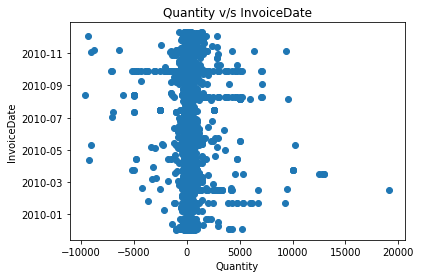

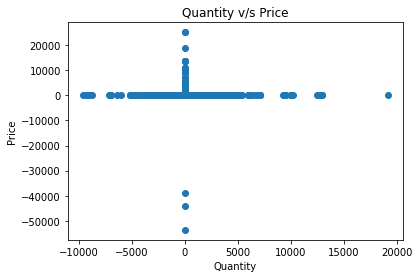

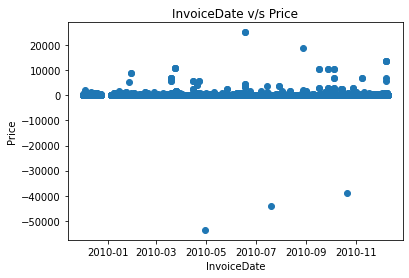

## Correlation:

## Missing Matrix:

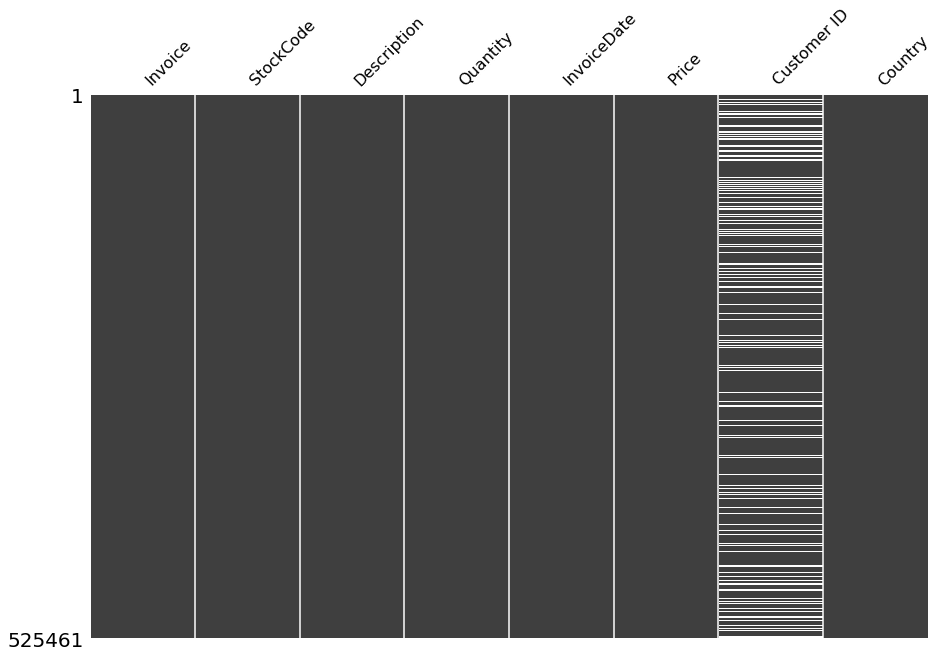

In [16]:
profile_df(df_retail)

En el gráfico de disperción Quantity vs Invoicedate, se evidencia un error, existe una gran cantidad de valores negativos para Quantity, lo que no tiene sentido considerando la naturaleza de la variable.

Además en Quantity vs Price y  InvoiceDate vs Price, se evidencia la existencia de 3 valores negativos para price, lo que tampoco tiene sentido.

Por otro lado, en la matriz de correlación se destaca que existe una correlaci+on negativa muy leve entre cantidad de productos comprados y su precio, 0.002. A priori uno esperaría una correlación con valor absoluto mayor, sin embargo tiene sentido respecto a que a mayor precio la gente suele comprar menos. Y como no se está midiendo respecto a mismo producto, no se tiene información respecto a la calidad del producto, por lo que un producto de precio mayor podría ser una mejor compra que un producto más barato.

Por último la Missing Matrix, muestra los valores nulos que se encuentran en Customer ID, y que en ninguna otra variable están. Además de como se comportan a lo largo del dataframe.

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

In [17]:
def limpieza(dataframe_in):
    df = dataframe_in.copy()
    df = df[df['Quantity']> 0]
    df = df[df['Price']> 0]
    df = df.dropna()
    return df
DF=limpieza(df_retail)
    

## Bivariant Analysis:

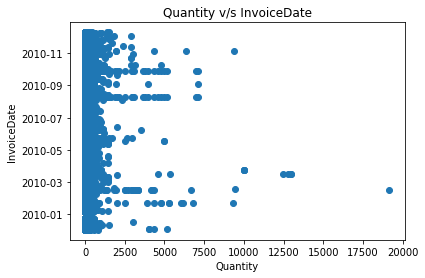

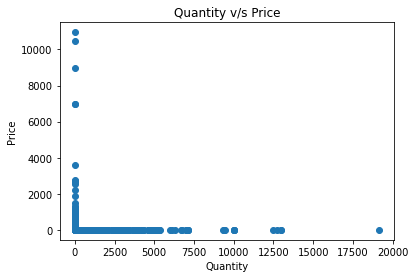

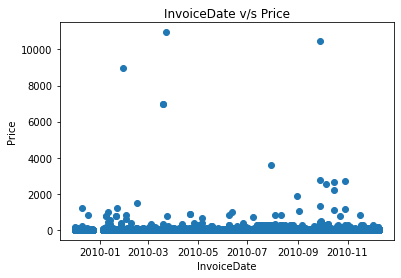

## Correlation:

## Missing Matrix:

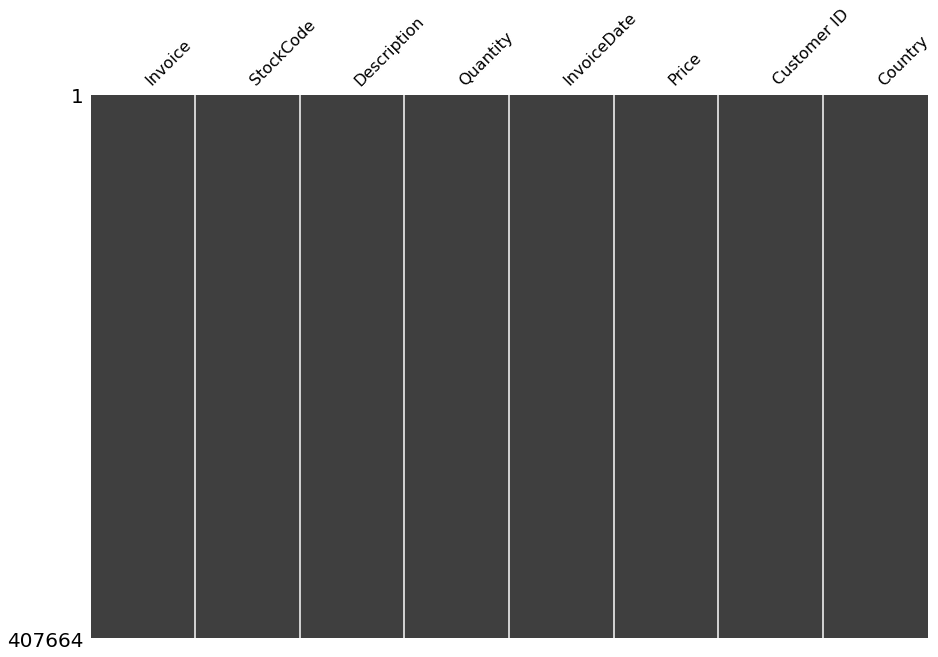

In [25]:
profile_df(DF)

Podemos ver que la función limpieza eliminó los valores negativos tanto para Quantity como Price, además eliminó los valores nulos que se encontraban en Customer ID. La eliminación de estos errores logró aumentar la correlación negativa entre precio y cantidad, presentando una relación más intuitiva.

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [26]:
df_retail3=DF.loc[:,['Description','Quantity','Price']]
df_retail3['Ingreso']=df_retail3['Quantity']*df_retail3['Price']

In [27]:
dataset = pd.pivot_table(df_retail3,
                                   index=['Description'],
                                   values=['Ingreso','Quantity'],
                                   aggfunc=np.sum)
dataset

,Ingreso,Quantity
Description,,
DOORMAT UNION JACK GUNS AND ROSES,1084.75,169
3 STRIPEY MICE FELTCRAFT,1243.05,663
4 PURPLE FLOCK DINNER CANDLES,265.20,200
ANIMAL STICKERS,80.85,385
BLACK PIRATE TREASURE CHEST,77.55,47
...,...,...
ZINC HEART LATTICE TRAY OVAL,364.15,325
ZINC METAL HEART DECORATION,16706.50,13958
ZINC POLICE BOX LANTERN,783.70,193


In [28]:
data=dataset.sort_values('Ingreso', ascending=False).reset_index().loc[0:29,:]
data

,Description,Ingreso,Quantity
0,WHITE HANGING HEART T-LIGHT HOLDER,151624.31,56915
1,REGENCY CAKESTAND 3 TIER,143893.35,12497
2,Manual,98560.64,2630
3,ASSORTED COLOUR BIRD ORNAMENT,70493.83,44551
4,JUMBO BAG RED RETROSPOT,51759.30,29578
5,POSTAGE,48741.08,2212
6,ROTATING SILVER ANGELS T-LIGHT HLDR,40186.65,21591
7,PAPER CHAIN KIT 50'S CHRISTMAS,36933.50,13860
8,PARTY BUNTING,35035.90,8316
9,EDWARDIAN PARASOL NATURAL,34044.75,7201


In [29]:
px.bar(data, x='Description', y='Ingreso')

In [30]:
px.bar(data, x='Description', y='Quantity')

El artículo más vendido es WHITE HANGING HEART T-LIGHT HOLDER	con un ingreso total de 157865 , seguido por REGENCY CAKESTAND 3 TIER, que genera una ganancia de 143893.3499,aquellos articulos agregados como "MANUAL" con 98560, y finalmente va DOTCOM POSTAGE	con	70493. Luego de estos los ingresos bajan considerablemente por producto, esos tres son los que más destacan en cuanto a la generación de ingresos. Se puede observar al comprar ambos gráficos de barras que no necesariamente el producto a mayor  cantidad de ventas llega de forma directa a  mayor ingresos, esto ocurre porque el precio de los productos no está considerado en la cantidad de ventas. Se puede ver el caso del REGENCY CAKESTAND 3 TIER, que tiene una baja cantidad de ventas, sin embargo, supero por bastamte a los demás productos en ingresos generados.

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [32]:
def plot_ventas(dataframe):
    data2 = dataframe.copy()
    data2['date']=data2['InvoiceDate'].dt.date
    dataset2 = pd.pivot_table(data2,
                                   index=['date'],
                                   values='Quantity',
                                   aggfunc=np.sum)
    fig = px.bar(dataset2.reset_index(), x='date', y='Quantity')
    fig.show()
plot_ventas(DF)

Si, primero tenemos periodos sin venta. Algunos puedes ser días (quizás un feriado o algo por el estilo)  pero durante enero vemos mucho tiempo sin ventas. También vemos 7 días con demasiadas ventas ( muy por encima del resto del año) llegando a alcanzar un día 124.700 articulos vendidos lo que pareciera ser muy raro viendo el historial del resto del año. 

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana y que **los días de atraso no se pueden utilizar para entregas de lab** solo para tareas. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=80dc9802-be88-4cf7-aefd-3febf57d3874' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>